In [1]:
"""
Alunos:
    David Cardoso Yonekura
    Lucas da Silva Lima
    Rafael Barbosa de Carvalho

"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuron import Neuron

Configuração:  [0.4, -100, 100]
Pesos da última iteração:  [ 48.44955945  18.15808432 -36.16265305]
Configuração:  [0.4, -1, 1]
Pesos da última iteração:  [ 1.38298636  0.07744912 -0.59596041]
Configuração:  [0.4, -0.5, 0.5]
Pesos da última iteração:  [ 0.88492064  0.1187579  -0.59190146]
Configuração:  [0.1, -100, 100]
Pesos da última iteração:  [27.48805085 -9.42930364 -7.6015573 ]
Configuração:  [0.1, -1, 1]
Pesos da última iteração:  [ 0.59743983 -0.07954027 -0.19805032]
Configuração:  [0.1, -0.5, 0.5]
Pesos da última iteração:  [ 0.32454427 -0.01094387 -0.18677542]
Configuração:  [0.01, -100, 100]
Pesos da última iteração:  [ 4.3967517   1.70475795 -3.31797817]
Configuração:  [0.01, -1, 1]
Pesos da última iteração:  [ 0.21774254 -0.06191229 -0.05750095]
Configuração:  [0.01, -0.5, 0.5]
Pesos da última iteração:  [ 0.0395797  -0.00287037 -0.01941535]


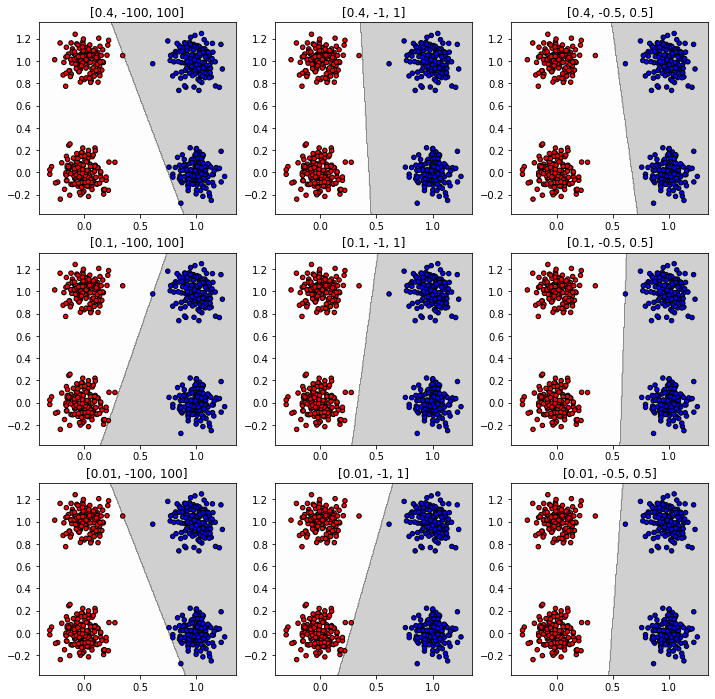

              Config  Media_Ajustes  Media_Epocas  Desvio_Ajustes  \
0   [0.4, -100, 100]         280.00         13.00      150.794496   
1       [0.4, -1, 1]           8.82          4.17        3.631474   
2   [0.4, -0.5, 0.5]           7.17          4.17        3.310755   
3   [0.1, -100, 100]        1068.58         41.15      614.377704   
4       [0.1, -1, 1]          15.58          4.12        8.513730   
5   [0.1, -0.5, 0.5]          10.16          4.25        5.401333   
6  [0.01, -100, 100]       11575.73        376.84     7061.931894   
7      [0.01, -1, 1]         129.87          7.19       73.974273   
8  [0.01, -0.5, 0.5]          63.68          4.91       40.659287   

   Desvio_Epocas  
0       7.009993  
1       1.349481  
2       1.077544  
3      30.854619  
4       1.544539  
5       1.687454  
6     281.139066  
7       2.625624  
8       1.860618  


In [2]:
def plotConfigs(X, y, x, line, n, configs, i):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.007),
                         np.arange(y_min, y_max, 0.007))

#     f = plt.figure(figsize=(10,8))
#     axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 6))
    axarr = plt.subplot(3,3,i)
    color = np.where(y == 0, 'r', 'b')

    for idx, clf, tt in zip([[0,0]],
                            [n],
                            [configs]):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z)
        Z = Z.reshape(xx.shape)

        axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
        axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
        axarr.set_title(tt)

    


with open('data/data3.txt', 'rb') as file:
    auxFile = file.read()

data3 = np.frombuffer(auxFile)
data3.resize((int(len(data3)/3)), 3)
X = data3[...,0:2] #[[x01,x02], ...]
y = data3[...,2] #[[yd0], [yd1], ...]

# #adicionando x_0 no x(n)
X = np.insert(X, 2, 1, axis=1)

configs = [[0.4,-100,100], [0.4,-1,1], [0.4,-0.5,0.5],
          [0.1,-100,100], [0.1,-1,1], [0.1,-0.5,0.5],
          [0.01,-100,100], [0.01,-1,1], [0.01,-0.5,0.5]]


ep_mean = []
fw_mean = []
ep_std = []
fw_std = []
fig = plt.figure(figsize=(12,12))
for k in range(len(configs)):
    print("Configuração: ", configs[k])
    n = Neuron(configs[k][0], configs[k][1], configs[k][2])
    (epoch, fitWeight) = n.iteratedFit(X, y, 100)
    print("Pesos da última iteração: ", n.weightArray)
    ep_mean.append(np.mean(epoch))
    fw_mean.append(np.mean(fitWeight))
    ep_std.append(np.std(epoch))
    fw_std.append(np.std(fitWeight))
    x = []
    line = []
    x = ([i for i in range(-len(data3),len(data3))])
    line = ([(n.weightArray[0]/n.weightArray[1]) * i * -1  - n.weightArray[2]/n.weightArray[0] for i in x])# calcula a reta y = mx + b
    plotConfigs(X,y,x, line, n, configs[k], k+1)


plt.show()
df = pd.DataFrame({ "Config": configs, "Media_Ajustes": fw_mean, "Media_Epocas": ep_mean, "Desvio_Ajustes": fw_std, "Desvio_Epocas": ep_std})
print(df)
